In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os

In [3]:
{"username":"khaikal","key":"9e492a7553b8e713debda6f4f6810151"}

{'username': 'khaikal', 'key': '9e492a7553b8e713debda6f4f6810151'}

In [4]:
cd "D:\Machine Learning\Modul Praktikum\Modul 4"

D:\Machine Learning\Modul Praktikum\Modul 4


In [5]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 72BD-0220

 Directory of D:\Machine Learning\Modul Praktikum\Modul 4

10/06/2021  06:49 PM           251,886 (versi 2) Modul 4 ML - Handling Overfit Problem #2 .ipynb
10/06/2021  08:55 AM             7,330 (versi 3) Kegiatan Modul 4.ipynb
12/05/2021  09:45 AM    <DIR>          .
12/05/2021  09:45 AM    <DIR>          ..
12/05/2021  02:14 AM     1,866,887,032 archive.zip
12/06/2021  12:43 AM    <DIR>          Dataset
               3 File(s)  1,867,146,248 bytes
               3 Dir(s)  143,582,994,432 bytes free


In [6]:
base_dir = 'D:\Machine Learning\Modul Praktikum\Modul 4\Dataset'

print('Jumlah Class : {}'.format(len(os.listdir(base_dir))))

covid19 = len(os.listdir(base_dir+'/COVID19'))
normal = len(os.listdir(base_dir+'/NORMAL'))
pneumonia = len(os.listdir(base_dir+'/PNEUMONIA'))
tuberculosis = len(os.listdir(base_dir+'/TURBERCULOSIS'))

print("DATASET AWAL ")
print('covid19 : ', covid19)
print('normal : ', normal)
print('pneumonia : ', pneumonia)
print('tuberculosis : ', tuberculosis)

Jumlah Class : 4
DATASET AWAL 
covid19 :  576
normal :  1583
pneumonia :  4273
tuberculosis :  703


In [7]:
import splitfolders

splitfolders.ratio(base_dir, output=base_dir, seed=1337, ratio=(.8, 0.19, 0.01)) 

Copying files: 7135 files [00:54, 130.25 files/s]


In [8]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_covid19_dir = os.path.join(train_dir, 'covid19')
train_normal_dir = os.path.join(train_dir, 'normal')
train_pneumonia_dir = os.path.join(train_dir, 'pneumonia')
train_turberculosis_dir = os.path.join(train_dir, 'turberculosis')

validation_covid19_dir = os.path.join(validation_dir, 'covid19')
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_pneumonia_dir = os.path.join(validation_dir, 'pneumonia')
validation_turberculosis_dir = os.path.join(validation_dir, 'turberculosis')

test_covid19_dir = os.path.join(test_dir, 'covid19')
test_normal_dir = os.path.join(test_dir, 'normal')
test_pneumonia_dir = os.path.join(test_dir, 'pneumonia')
test_turberculosis_dir = os.path.join(test_dir, 'turberculosis')

In [9]:
print('Train : ')
print('Train Covid19 :', len(os.listdir(train_covid19_dir)))
print('Train Normal :', len(os.listdir(train_normal_dir)))
print('Train Pneumonia :', len(os.listdir(train_pneumonia_dir)))
print('Train Tuberculosis :', len(os.listdir(train_turberculosis_dir)))
print(""*2)
print('Validation : ')
print('Validation Covid19 :', len(os.listdir(validation_covid19_dir)))
print('Validation Normal :', len(os.listdir(validation_normal_dir)))
print('Validation Pneumonia :', len(os.listdir(validation_pneumonia_dir)))
print('Validation Tuberculosis :', len(os.listdir(validation_turberculosis_dir)))
print(""*2)
print('Test : ')
print('Test Covid19 :', len(os.listdir(test_covid19_dir)))
print('Test Normal :', len(os.listdir(test_normal_dir)))
print('Test Pneumonia :', len(os.listdir(test_pneumonia_dir)))
print('Test Tuberculosis :', len(os.listdir(test_turberculosis_dir)))

Train : 
Train Covid19 : 460
Train Normal : 1266
Train Pneumonia : 3418
Train Tuberculosis : 562

Validation : 
Validation Covid19 : 109
Validation Normal : 300
Validation Pneumonia : 811
Validation Tuberculosis : 133

Test : 
Test Covid19 : 7
Test Normal : 17
Test Pneumonia : 44
Test Tuberculosis : 8


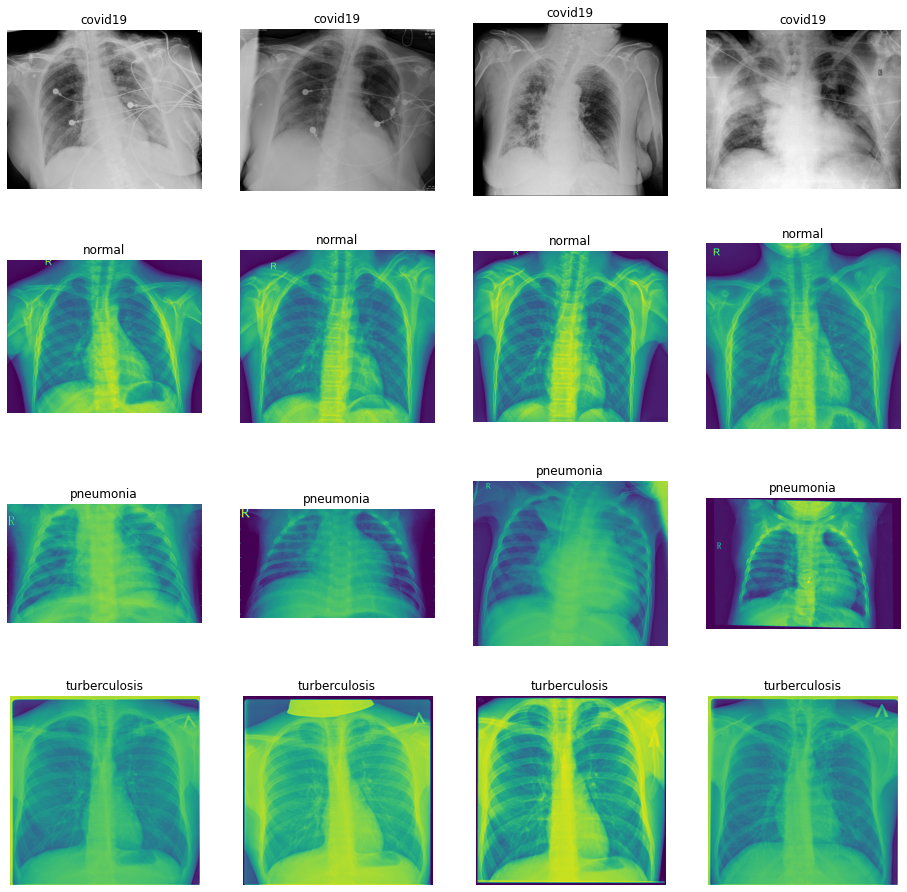

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
Train_covid19 = [os.path.join(train_covid19_dir, fname) 
                for fname in os.listdir(train_covid19_dir)[pic_index-4:pic_index]]

Train_normal = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]

Train_pneumonia = [os.path.join(train_pneumonia_dir, fname) 
                for fname in os.listdir(train_pneumonia_dir)[pic_index-4:pic_index]]

Train_turberculosis= [os.path.join(train_turberculosis_dir, fname) 
                for fname in os.listdir(train_turberculosis_dir)[pic_index-4:pic_index]]
for i, img_path in enumerate(Train_covid19+Train_normal+Train_pneumonia+Train_turberculosis):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
TRAINING_DIR = train_dir
VALIDATION_DIR = validation_dir
TEST_DIR = test_dir

datagen = ImageDataGenerator(rescale=0)

train_gen = datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    shuffle=True,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    shuffle=False,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150,150),
    shuffle=False,
    class_mode='categorical'
)

Found 5706 images belonging to 4 classes.
Found 1353 images belonging to 4 classes.
Found 76 images belonging to 4 classes.


In [13]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp


In [14]:
%reload_ext tensorboard

In [15]:
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.4, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'adadelta']))

METRIC_ACCURACY = 'accuracy'
hparam_summary_dir = 'D:\Machine Learning\Modul Praktikum\Modul 4\Dataset'

first_mine_model_dict = dict()
first_mine_history_dict = dict()

second_mine_model_dict = dict()
second_mine_history_dict = dict()

In [17]:
#Definisikan x_val dan y_val dari validation data untuk evaluasi model.
import numpy as np
xtest, ytest = zip(*(test_gen[i] for i in range(len(test_gen))))
x_test, y_test = np.vstack(xtest), np.vstack(ytest)

In [18]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D,MaxPool2D, AveragePooling2D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [19]:
def train_test_first_model(hparams, session_num):
    global first_mine_model_dict
    global first_mine_history_dict

    model = Sequential()

    # Feature Extraction Layer
    model.add(InputLayer(input_shape=(150,150,3,)))
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(MaxPool2D())
   
    model.add(BatchNormalization())
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(hparams[HP_NUM_UNITS], activation='relu'))
    model.add(Dense(36, activation='relu'))
    model.add(Dropout(hparams[HP_DROPOUT]))
    model.add(Dense(4, activation='softmax'))

    # Compile Model
    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss='categorical_crossentropy',
        metrics='accuracy'
    )

    # Fit Model
    H = model.fit(train_gen,
                  validation_data=val_gen, 
                  epochs=50,
                  )
    
    # Gather Model and History
    first_mine_model_dict[session_num] = model
    first_mine_history_dict[session_num] = H.history

    # Evaluate Model
    _, accuracy = model.evaluate(x_test, y_test)

    return accuracy

In [20]:
#Definisikan fungsi run
def first_model_run(run_dir, hparams, session_num):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)
        accuracy = train_test_first_model(hparams, session_num)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
    for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
        for optimizer in HP_OPTIMIZER.domain.values:
            hparams = {
                HP_NUM_UNITS: num_units,
                HP_DROPOUT: dropout_rate,
                HP_OPTIMIZER: optimizer,
            }
            run_name = "first_model_run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            first_model_run((hparam_summary_dir + '/' + run_name), hparams, session_num)
            session_num += 1

--- Starting trial: first_model_run-0
{'num_units': 64, 'dropout': 0.4, 'optimizer': 'adadelta'}
Epoch 1/50
179/179 [==============================] - 485s 3s/step - loss: 1.3029 - accuracy: 0.4779 - val_loss: 0.9949 - val_accuracy: 0.6038
Epoch 2/50
179/179 [==============================] - 499s 3s/step - loss: 1.0489 - accuracy: 0.5829 - val_loss: 0.8672 - val_accuracy: 0.6430
Epoch 3/50
179/179 [==============================] - 394s 2s/step - loss: 0.9341 - accuracy: 0.6148 - val_loss: 0.7887 - val_accuracy: 0.6711
Epoch 4/50
179/179 [==============================] - 449s 3s/step - loss: 0.8612 - accuracy: 0.6479 - val_loss: 0.7259 - val_accuracy: 0.7021
Epoch 5/50
179/179 [==============================] - 673s 4s/step - loss: 0.7979 - accuracy: 0.6795 - val_loss: 0.6708 - val_accuracy: 0.7280
Epoch 6/50
179/179 [==============================] - 742s 4s/step - loss: 0.7555 - accuracy: 0.6963 - val_loss: 0.6209 - val_accuracy: 0.7539
Epoch 7/50
179/179 [=========================

In [ ]:
%tensorboard --logdir 'D:\Machine Learning\Modul Praktikum\Modul 4\Dataset\hparam_summary_dir'